# Análisis de Datos y Reducción de Dimensionalidad

Por Zarco Romero José Antonio

## Contenido
1. [Selección del Conjunto de Datos](#1)
2. [Exploración inicial](#2)
      1. [Problemática](#2.1)
      2. [Características](#2.2)
3. [Normalización](#3)
4. [Mapa de Calor](#4)
5. [Análisis de Características](#5)
6. [Conclusión sobre la Reducción de Dimensionalidad](#6)

<a id="1"></a>
# 1. Selección del Conjunto de Datos: [Depresión](https://www.kaggle.com/datasets/anthonytherrien/depression-dataset/data)

Este conjunto de datos contiene información sobre individuos con diversos atributos relacionados con sus factores personales y de estilo de vida. Está diseñado para facilitar el análisis en áreas como la salud, el estilo de vida y el estatus socioeconómico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [66]:
df = pd.read_csv('depression_data.csv')

<a id="2"></a>
# 2. Exploración inicial

<a id="2.1"></a>
## 2.1 Problemática


Este conjunto de datos está pensado para su uso en el análisis de diversos factores socioeconómicos, de estilo de vida y de salud. Es adecuado para tareas como el modelado predictivo, la agrupación y el análisis exploratorio de datos.


<a id="2.2"></a>
## 2.2 Características

| **Atributo** | **Descripción** |
| ---: | :--- |
| **Name**                         | El nombre completo del individuo.                                                         |
| **Age**                           | La edad del individuo en años.                                                            |
| **Marital Status**                   | El estado civil del individuo. Posibles valores: `Single`, `Married`, `Divorced`, y `Widowed` (Soltero, casado, divorciado y viudo).                                     |
| **Education Level**                | El nivel educativo más alto alcanzado por el individuo. Posibles valores: `High School`, `Associate Degree`, `Bachelor's Degree`, `Master's Degree`, y `PhD` (Escuela secundaria, título asociado, licenciatura, maestría y doctorado.). |
| **Number of Children**                | La cantidad de hijos que tiene el individuo.                                               |
| **Smoking Status**              | Indica si el individuo es fumador o no. Posibles valores: `Smoker`, `Former` y `Non-smoker`. (Fumador, Ex-fumador, No fumador). |
| **Physical Activity Level**      | El nivel de actividad física del individuo. Posibles valores: `Sedentary`, `Moderate`, y `Active` (Sedentario, Moderado, Activo). |
| **Employment Status**                 | El estado laboral del individuo. Posibles valores: `Employed` y `Unemployed`. (Empleado, Desempleado).                  |
| **Income**                       | Los ingresos anuales del individuo en USD.                                                 |
| **Alcohol Consumption**             | El nivel de consumo de alcohol. Posibles valores: `Low`, `Moderate`, y `High` (Bajo, Moderado, Alto).                    |
| **Dietary Habits**           | Los hábitos alimenticios del individuo. Posibles valores: `Healthy`, `Moderate`, y `Unhealthy` (Saludable, Moderado, No saludable).|
| **Sleep Patterns**              | La calidad del sueño. Posibles valores: `Good`, `Fair`, y `Poor` (Bueno, Regular, Malo).                              |
| **History of Mental Illness** | Si el individuo tiene un historial de enfermedad mental. Posibles valores: `Yes` y `No` (Sí, No).         |
| **History of Substance Abuse**| Si el individuo tiene un historial de abuso de sustancias. Posibles valores: `Yes` y `No` (Sí, No).      |
| **Family History of Depression**| Indica si hay un historial familiar de depresión. Posibles valores: `Yes` y `No` (Sí, No).                |
| **Chronic Medical Conditions**          | Si el individuo tiene enfermedades crónicas. Posibles valores: `Yes` y `No` (Sí, No).                     |


In [67]:
# Mostrar las primeras 5 filas del DataFrame
print("\nHead")
df.head()


Head


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [68]:
# Obtener información general sobre el DataFrame
print("\nInformación general")
df.info()


Información general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illne

In [69]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico")
df.describe()


Resumen estadístico


,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [70]:
# Obtener columnas numéricas
print("\nColumnas numéricas")
df.describe(include=[np.number])


Columnas numéricas


,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [71]:
# Obtener columnas de cadena
print("\nColumnas de cadena")
df.describe(include=[object])


Columnas de cadena


,Name,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
count,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768
unique,196851,4,5,3,3,2,3,3,3,2,2,2,2
top,Michael Smith,Married,Bachelor's Degree,Non-smoker,Sedentary,Employed,Moderate,Unhealthy,Fair,No,No,No,No
freq,198,240444,124329,247416,176850,265659,173440,170817,196789,287943,284880,302515,277561


In [72]:
# Tamaño del dataset
print("\nTamaño del dataset")
df.shape


Tamaño del dataset


(413768, 16)

In [73]:
# Calcular la varianza de las columnas numéricas
print("\nVarianza de las columnas numéricas:")
variance = df.select_dtypes(include=np.number).var()
variance


Varianza de las columnas numéricas:


Age                   3.297405e+02
Number of Children    1.530303e+00
Income                1.650318e+09
dtype: float64

In [74]:
# Datos categóricos
columnas_categoricas = df.select_dtypes(include=object).columns
for columna in columnas_categoricas:
    print(f"\nColumna: {columna}")
    print(df[columna].value_counts())


Columna: Name
Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64

Columna: Marital Status
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64

Columna: Education Level
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64

Columna: Smoking Status
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

Columna: Physical Activity Level
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64

Columna: Employment Status
Employment Status
Employed      26

Puesto que la columna `Name` tiene muchísimas categorías, no nos sirve de mucho y podemos eliminarla.

In [75]:
# Elimina columna `Name`
df = df.drop('Name', axis=1)

Luego, las columnas de respuesta `Yes` / `No`, podemos convertirlas en unos y ceros para trabajar con variables numéricas y así, ser capaces de analizarlas.

In [76]:
# Convertir 'Yes' a 1 y 'No' a 0
columnas_yes_no = ['History of Mental Illness',
                  'History of Substance Abuse',
                  'Family History of Depression',
                  'Chronic Medical Conditions']
for columna in columnas_yes_no:
    df[columna] = df[columna].map({'Yes': 1, 'No': 0})

Podemos realizar lo mismo con la columna `Employment Status`

In [83]:
df['Employment Status'] = df ['Employment Status'].map({'Employed': 1, 'Unemployed': 0})

<a id="3"></a>
# 3. Normalización

Ajusta los datos a un rango específico

In [84]:
columnas_numericas = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

<a id="4"></a>
# 4. Mapa de Calor

In [85]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df[columnas_numericas].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                                   Age  Number of Children  Employment Status  \
Age                           1.000000            0.259268          -0.217613   
Number of Children            0.259268            1.000000          -0.030502   
Employment Status            -0.217613           -0.030502           1.000000   
Income                       -0.065628            0.028737           0.654881   
History of Mental Illness     0.024683            0.002713          -0.140764   
History of Substance Abuse   -0.024388           -0.008061           0.003981   
Family History of Depression  0.107310            0.081044          -0.025649   
Chronic Medical Conditions   -0.017625           -0.006997          -0.042413   

                                Income  History of Mental Illness  \
Age                          -0.065628                   0.024683   
Number of Children            0.028737                   0.002713   
Employment Status             0.654881                  -0.1407

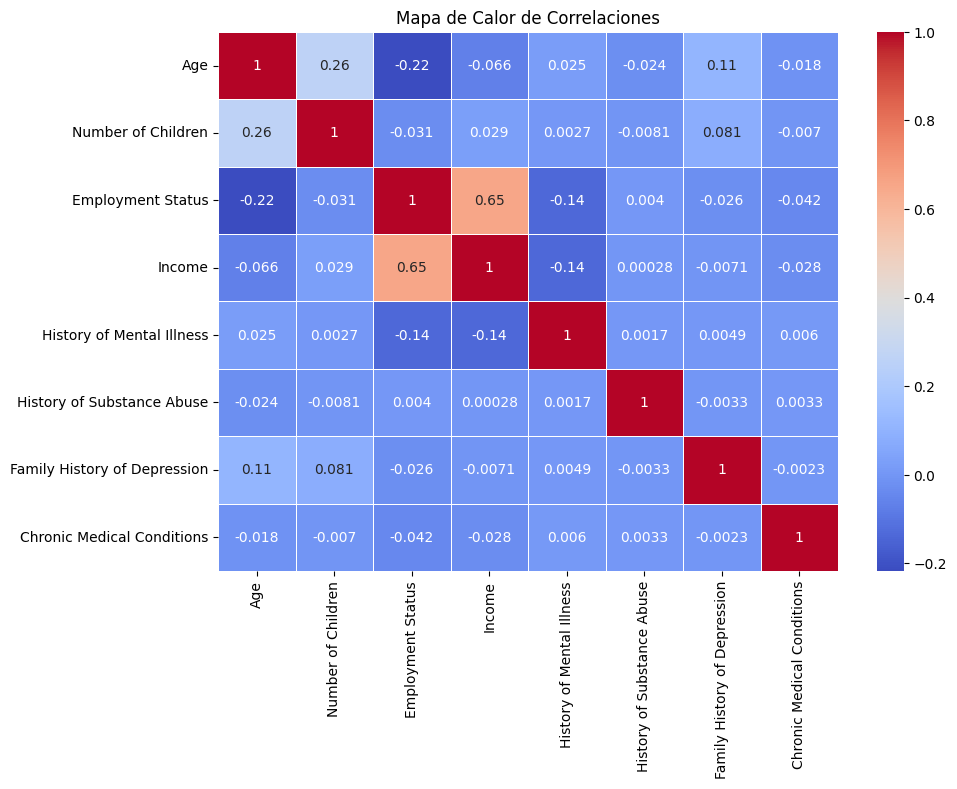

In [88]:
# Generar el mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Nótese que se presenta un valor de correlación de 0.65 entre `Employment Status` y `Income`, lo que indica una correlación positiva moderada a fuerte entre dos variables. Esto sugiere que a medida que una variable aumenta, la otra también tiende a aumentar.

Por otro lado, la mayoría de los otros valores se encuentran en azul (suponiendo que estos representen correlaciones más débiles), esto sugiere que no hay relaciones tan fuertes como la observada con 0.65.

<a id="5"></a>
# 5. Análisis de Características

In [89]:
columnas_numericas = df.select_dtypes(include=np.number).columns

for columna in columnas_numericas:
    media = df[columna].mean()
    mediana = df[columna].median()
    desviacion_estandar = df[columna].std()

    print(f"Columna: {columna}")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Desviación Estándar: {desviacion_estandar:.2f}\n")

Columna: Age
  Media: 0.50
  Mediana: 0.50
  Desviación Estándar: 0.29

Columna: Number of Children
  Media: 0.32
  Mediana: 0.25
  Desviación Estándar: 0.31

Columna: Employment Status
  Media: 0.64
  Mediana: 1.00
  Desviación Estándar: 0.48

Columna: Income
  Media: 0.24
  Mediana: 0.18
  Desviación Estándar: 0.19

Columna: History of Mental Illness
  Media: 0.30
  Mediana: 0.00
  Desviación Estándar: 0.46

Columna: History of Substance Abuse
  Media: 0.31
  Mediana: 0.00
  Desviación Estándar: 0.46

Columna: Family History of Depression
  Media: 0.27
  Mediana: 0.00
  Desviación Estándar: 0.44

Columna: Chronic Medical Conditions
  Media: 0.33
  Mediana: 0.00
  Desviación Estándar: 0.47



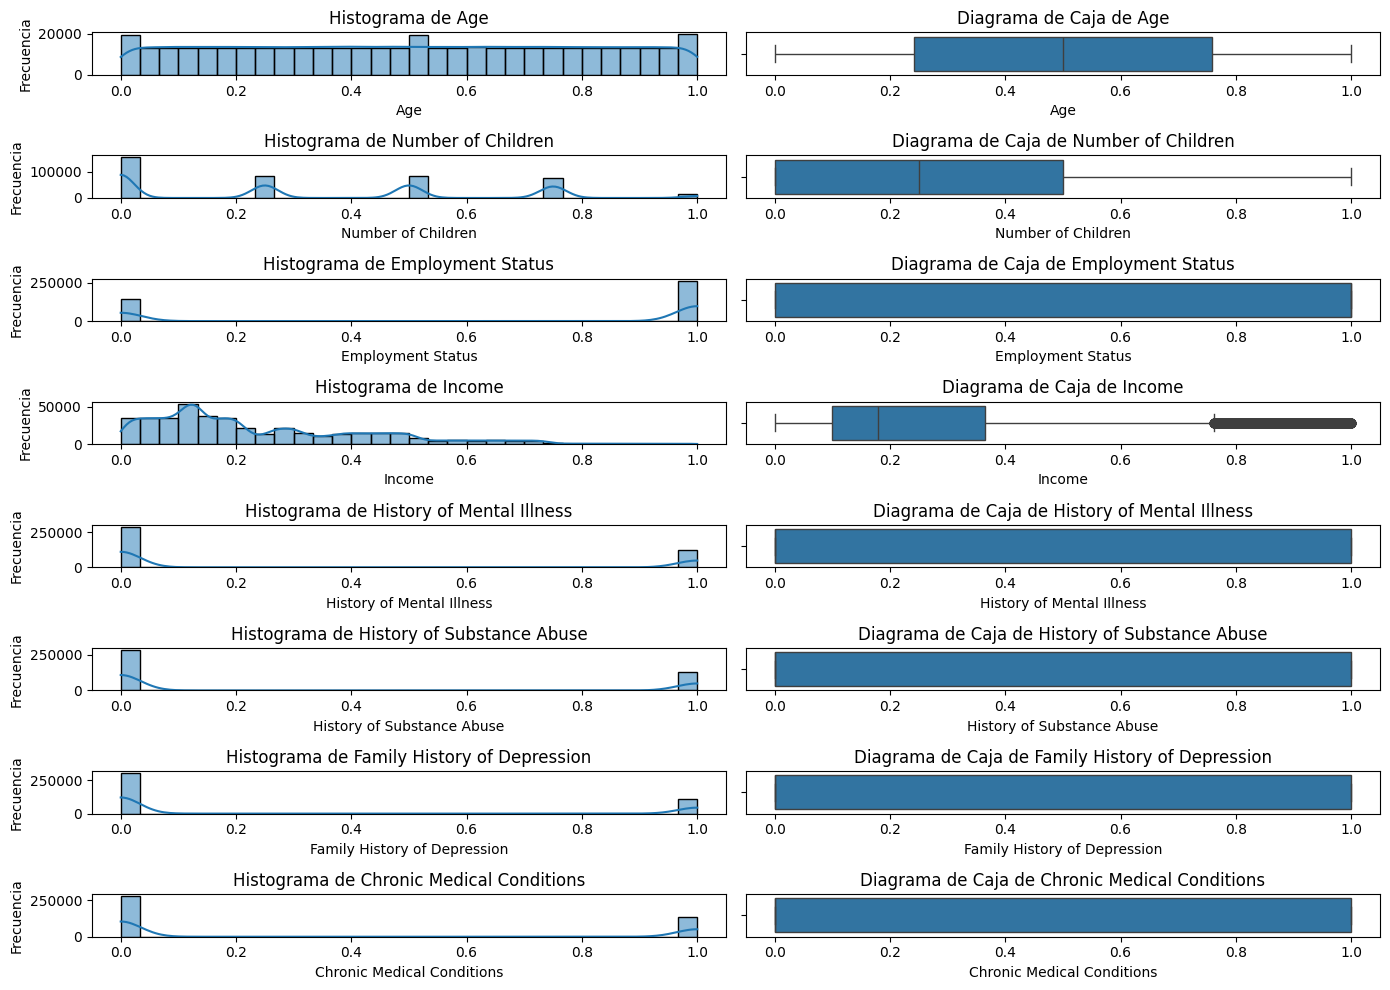

In [90]:
plt.figure(figsize=(14, 10))

for i, columna in enumerate(columnas_numericas):
    plt.subplot(len(columnas_numericas), 2, i * 2 + 1)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    plt.subplot(len(columnas_numericas), 2, i * 2 + 2)
    sns.boxplot(x=df[columna])
    plt.title(f'Diagrama de Caja de {columna}')

plt.tight_layout()
plt.show()

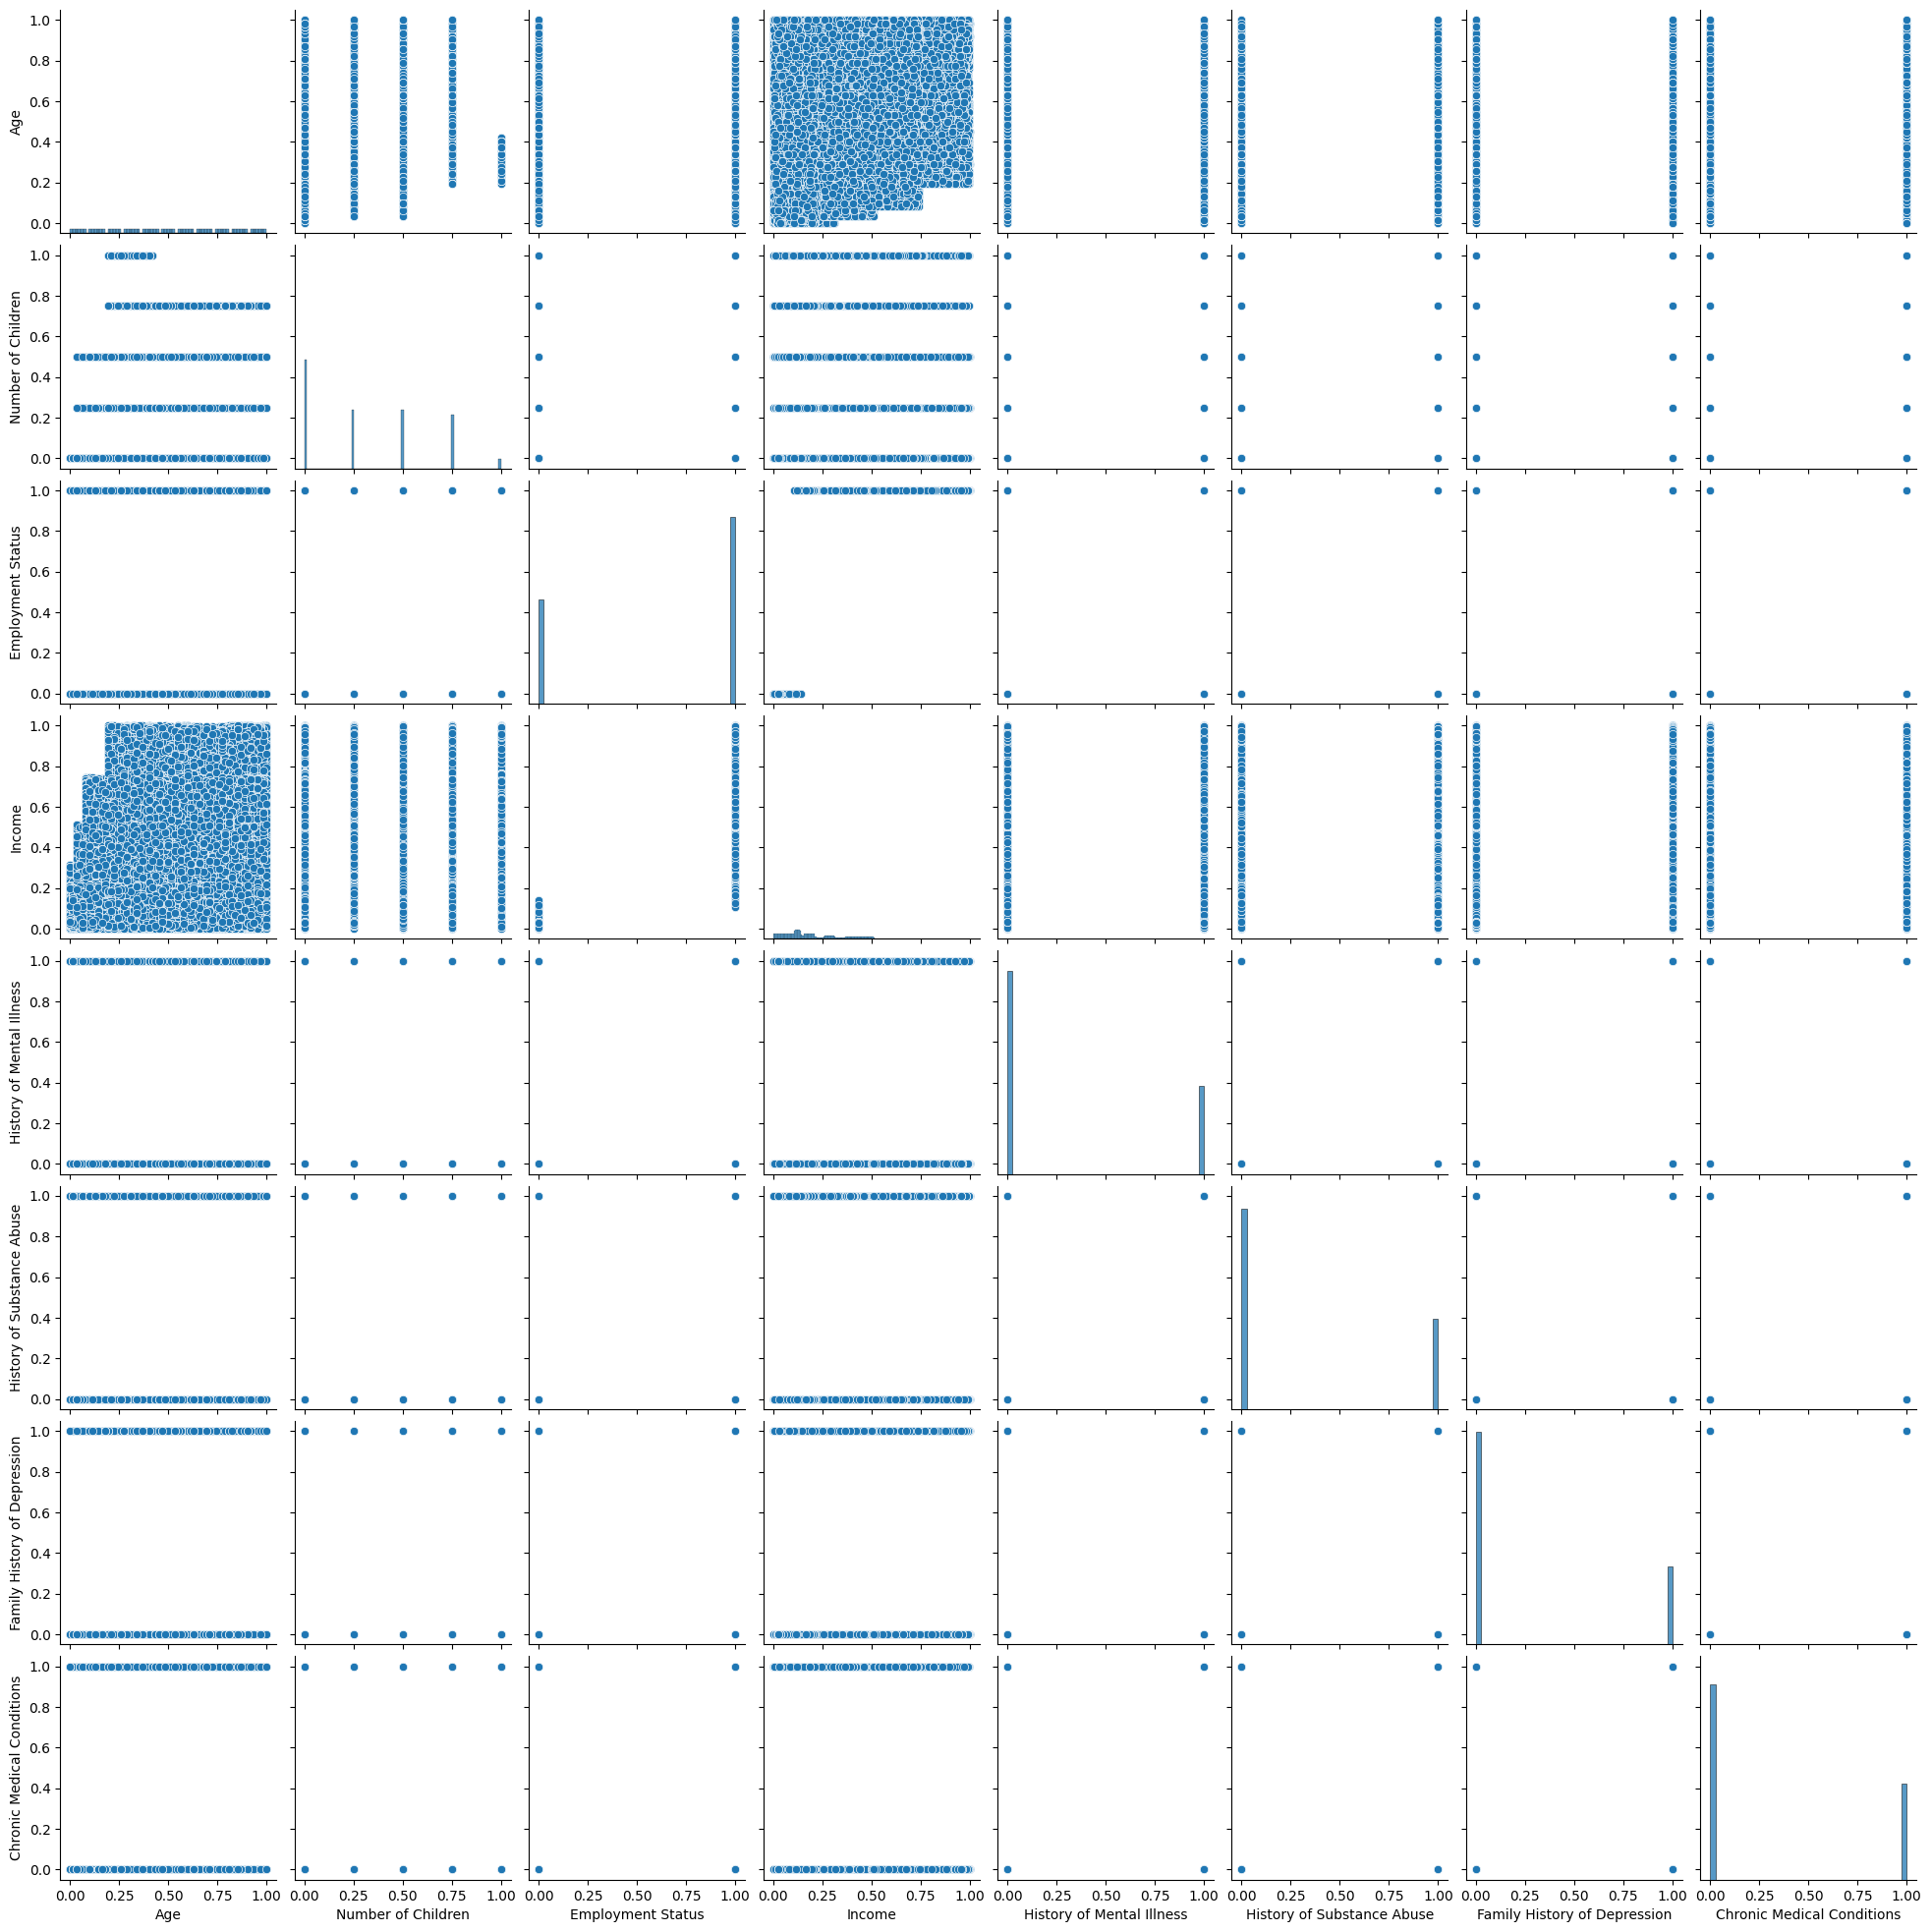

In [92]:
sns.pairplot(df)

Al analizar el conjunto de datos sobre la depresión, he identificado algunas características que considero irrelevantes para el problema en cuestión. En primer lugar, la columna `Name` tiene una gran cantidad de categorías únicas que no aportan información útil para el análisis y, por lo tanto, se puede eliminar sin afectar los resultados del modelo.

Además, las columnas como `History of Mental Illness`, `History of Substance Abuse`, `Family History of Depression`, y `Chronic Medical Conditions`, pueden ser convertidas a valores numéricos (1 para "`Yes`" y 0 para "`No`"). Esto facilitará su inclusión en modelos de machine learning, ya que los algoritmos generalmente requieren datos numéricos para el entrenamiento.

En cuanto a `Employment Status`, aunque puede tener cierta relevancia, es importante considerar que su valor puede ser interpretado de diferentes maneras dependiendo del contexto. Para nuestro análisis, podría ser más útil convertir esta columna en variables numéricas (por ejemplo, 1 para "`Employed`" y 0 para "`Unemployed`") para facilitar la comparación y el análisis de su impacto en la depresión.

<a id="6"></a>
# 6. Conclusión sobre la Reducción de Dimensionalidad

Se decidió eliminar la columna `Name` del conjunto de datos para reducir la dimensionalidad, ya que su inclusión no aporta información relevante al análisis. Esta columna contiene nombres de individuos, lo que no tiene impacto en la capacidad predictiva del modelo de inteligencia artificial. Al tener una alta cardinalidad, podría complicar el modelo al introducir ruido innecesario, lo que puede llevar a un **overfitting**. Por lo tanto, su eliminación simplifica el conjunto de datos, permitiendo que el modelo se enfoque en características que realmente contribuyen a la predicción de la depresión.

Al eliminar características irrelevantes como `Name`, se espera que el rendimiento del modelo de IA mejore. Un modelo más simple no solo es más fácil de interpretar, sino que también se entrena más rápidamente y se generaliza mejor a nuevos datos. Esta reducción de dimensionalidad ayuda a disminuir el riesgo de overfitting y a mejorar la precisión del modelo, asegurando que se concentre en los factores que realmente influyen en el problema que se está tratando de resolver.